In [1]:
from DiffeoOT import *
from utils import *
import torch
import torch.nn.functional as tnn
import time 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
m=16

x = torch.linspace(-1,1,m)
y = torch.linspace(-1,1,m)
grid = torch.zeros((1,m,m,2)).to(dtype=torchdtype, device=torchdeviceId)
for i in range(0,m):
        for j in range(0,m):
            grid[0,i,j,0]= x[i]
            grid[0,i,j,1]= y[j]

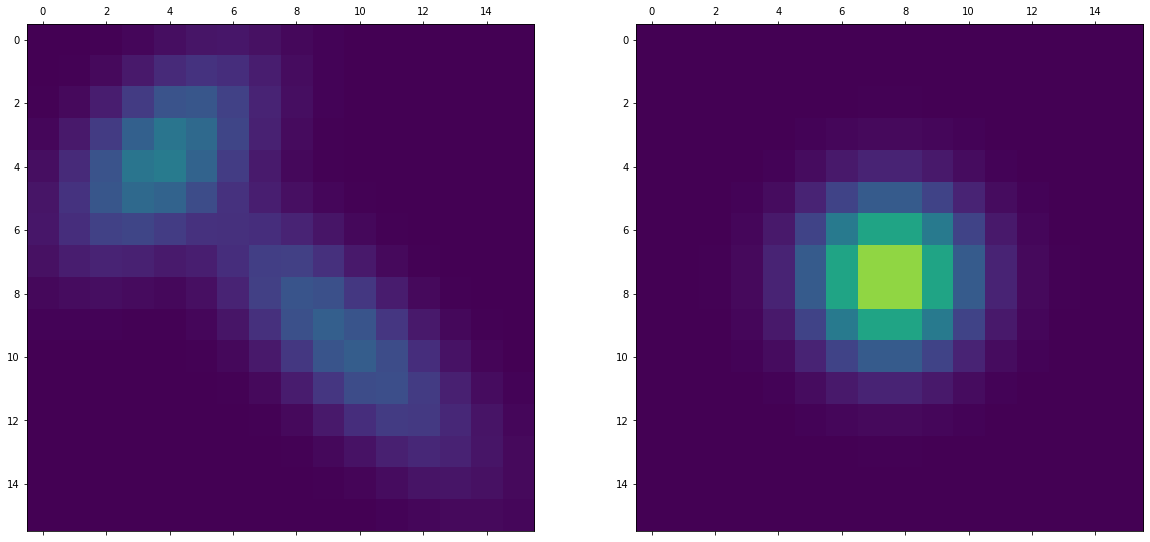

In [3]:
G1=torch.Tensor([[10,0],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,10],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[10,-15],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = gaussian(0,0,G1,grid)

mu_1 = normalize(gaussian(-.5,-.5,G2,grid)+gaussian(.25,.25,G3,grid))

plot_pair(mu_1,mu_2)

C:\Users\emanh\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


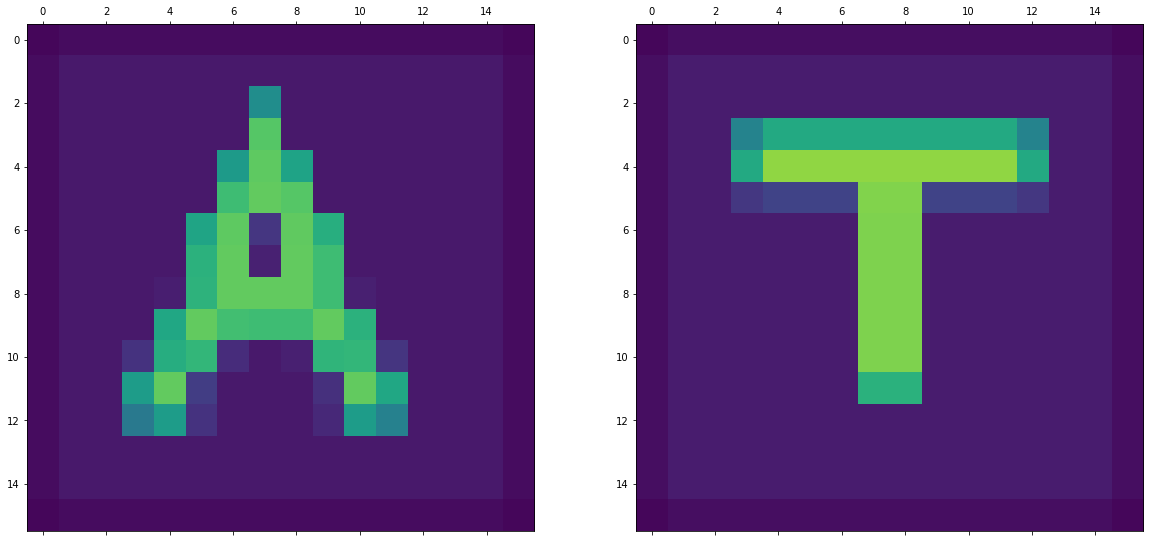

In [4]:
mu_2 = load_dist("T.png",grid)
mu_1 = load_dist("A.png",grid)
plot_pair(mu_1,mu_2)

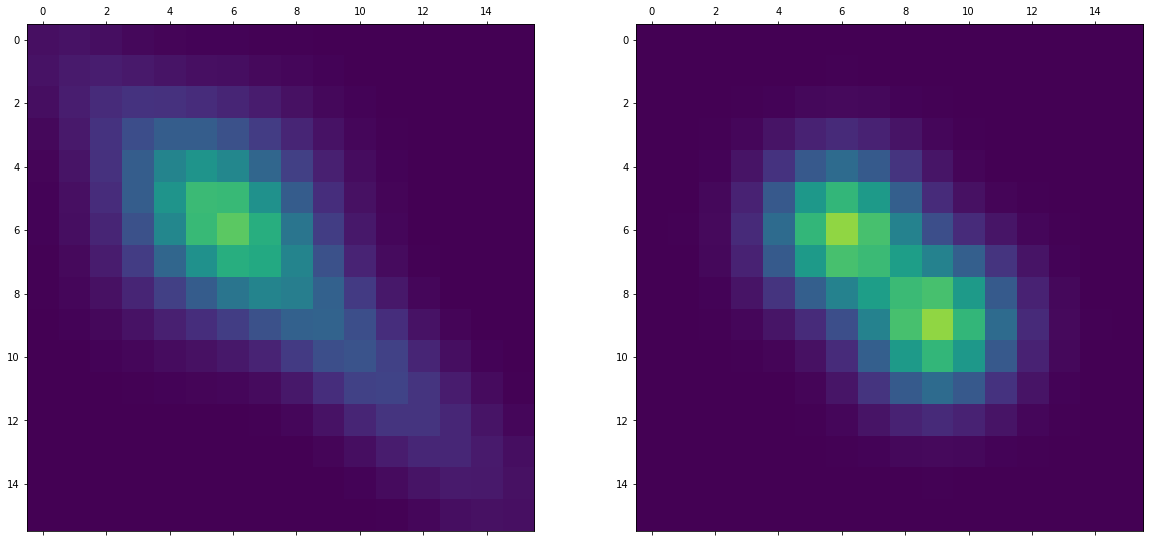

In [6]:
G1=torch.Tensor([[12,0],[0,12]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,-18],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[7,0],[0,7]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = normalize(gaussian(.2,.2,G1,grid)+ gaussian(-.2,-.2,G1,grid))

mu_1 = normalize(gaussian(0,0,G2,grid)+gaussian(-.25,-.25,G3,grid))

plot_pair(mu_1,mu_2)

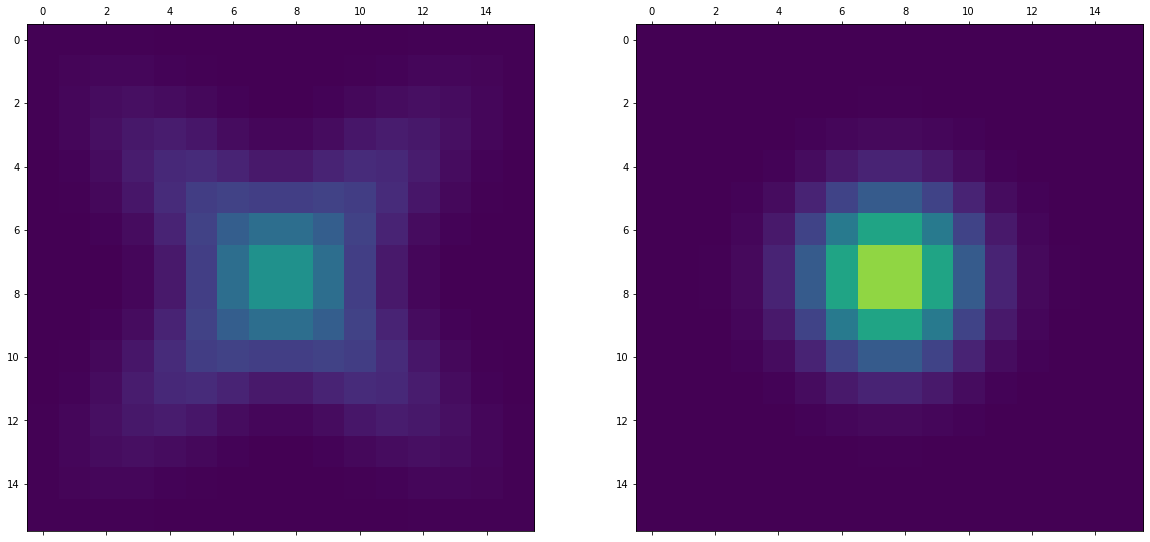

In [14]:
G1=torch.Tensor([[10,0],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,16],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[10,-16],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = gaussian(0,0,G1,grid)

mu_1 = normalize(gaussian(0,0,G2,grid)+gaussian(0,0,G3,grid))

plot_pair(mu_1,mu_2)

In [15]:
params=[]
params+=[{'T':6, 'match_coeff':100000000, 'path_coeff':1}]

In [21]:
def L(out):
    #out=torch.unsqueeze(out,0)
    #weight = torch.Tensor([[[[10,10,10],[10,0,10],[10,10,10]]]]).to(dtype=torchdtype, device=torchdeviceId)
    #out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    #out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    #out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    return out

In [22]:
def inner_prod(X,source,p,grid):
    pm=p
    pX= pm*X.transpose(0,2)
    return (((L(pX))**2).sum(dim=0)/(pm)).sum()*(4/(m**2))  

In [23]:
start =time.time()
vecs,ps = DiffeoOT_multires(mu_1,mu_2,grid,params,inner_prod)
print(time.time()-start)
pl_pathlength = path_length(grid,mu_1,inner_prod,vecs)
print(pl_pathlength)
N=vecs.shape[0]

86.42826080322266
[0.30004756 0.2293602  0.19286944 0.16935127 0.15470665]


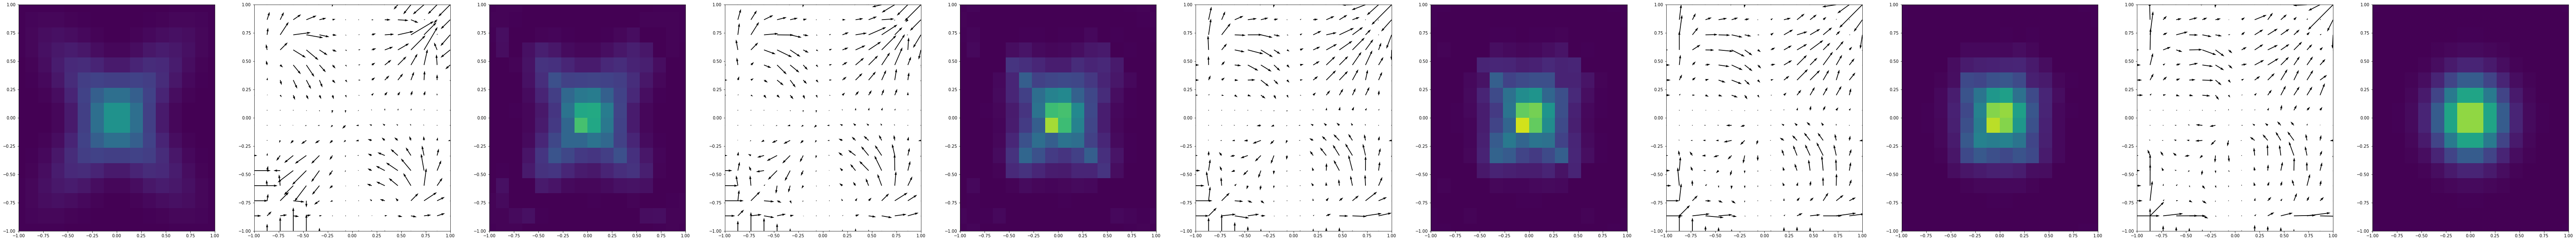

(120, 16, 16)


In [24]:
plot_sequence(mu_1,mu_2,grid,ps,vecs)
save_gif(mu_1,mu_2,ps)

In [25]:
print(pl_pathlength.sum()/pl_pathlength.shape[0])

0.20926702252634985


In [26]:
import ot
supports = grid.reshape(m*m,1,2)
costmatrix = ((supports-supports.transpose(0,1))**2).sum(dim=2).cpu().numpy()
m1=mu_1.reshape(m*m).cpu().numpy()
m2=mu_2.reshape(m*m).cpu().numpy()

Wd =  ot.sinkhorn2(m1, m2, costmatrix, .00075)
print(np.sqrt(Wd))

0.1511449599668916


C:\Users\emanh\AppData\Roaming\Python\Python39\site-packages\ot\bregman.py:492: UserWarning: Warning: numerical errors at iteration 85
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
